In [42]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications import VGG16

import tensorflow as tf

import numpy as np 
import pandas as pd 

import os
import matplotlib.pyplot as plt

In [20]:
val_path = "data/extracted/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
train_path = "data/extracted/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
dirs = os.listdir(train_path)

labels = [folder for folder in dirs]

In [21]:
train_dir = 'data/extracted/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/'
val_dir = 'data/extracted/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/'

train_dirs = [train_dir + lb for lb in labels]
val_dirs = [train_dir + lb for lb in labels]
batch_size = 32
image_width,image_height = 128,128

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='categorical')

validation_generator = train_datagen.flow_from_directory(
    val_dir,
    target_size=(image_width,image_height),
    batch_size=batch_size,
    class_mode='categorical')


nb_train_samples = 70295
nb_validation_samples = 17572

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [22]:
vgg16 = VGG16(weights='imagenet',
             include_top=False,
             input_shape=(128,128,3))

vgg16.summary()
vgg16.trainable = False

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [23]:
model = Sequential()
model.add(vgg16)
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(38))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                524352    
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 38)                2470      
_________________________________________________________________
activation_3 (Activation)    (None, 38)                0         
Total params: 15,241,510
Trainable params: 526,822
Non-trainable params: 14,714,688
____________________________________

In [25]:
history = model.fit(
        train_generator,
        steps_per_epoch=nb_train_samples // batch_size,
        epochs=20,
        validation_data=validation_generator,
        validation_steps=nb_validation_samples // batch_size,
        verbose=1)

Epoch 1/20
2196/2196 [==============================] - 311s 142ms/step - loss: 0.7966 - accuracy: 0.7636 - val_loss: 0.4046 - val_accuracy: 0.8678
Epoch 2/20
2196/2196 [==============================] - 311s 142ms/step - loss: 0.3319 - accuracy: 0.8887 - val_loss: 0.3451 - val_accuracy: 0.8863
Epoch 3/20
2196/2196 [==============================] - 311s 142ms/step - loss: 0.2521 - accuracy: 0.9150 - val_loss: 0.3314 - val_accuracy: 0.8932
Epoch 4/20
2196/2196 [==============================] - 311s 142ms/step - loss: 0.2046 - accuracy: 0.9307 - val_loss: 0.2911 - val_accuracy: 0.9077
Epoch 5/20
2196/2196 [==============================] - 309s 141ms/step - loss: 0.1754 - accuracy: 0.9405 - val_loss: 0.4334 - val_accuracy: 0.8765
Epoch 6/20
2196/2196 [==============================] - 310s 141ms/step - loss: 0.1540 - accuracy: 0.9478 - val_loss: 0.3578 - val_accuracy: 0.8987
Epoch 7/20
2196/2196 [==============================] - 310s 141ms/step - loss: 0.1349 - accuracy: 0.9535 - val_

## Accuracy per epoch

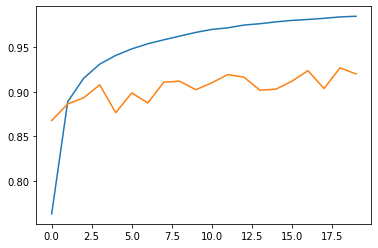

In [33]:
plt.plot(np.arange(0,20),history.history['accuracy'])
plt.plot(np.arange(0,20),history.history['val_accuracy'])

## Loss per epoch

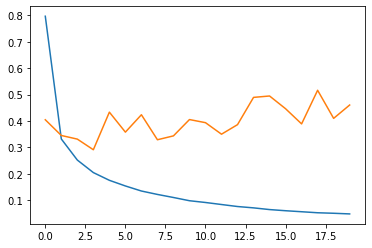

In [34]:
plt.plot(np.arange(0,20),history.history['loss'])
plt.plot(np.arange(0,20),history.history['val_loss'])

## Citation

Ferentinos, Konstantinos. (2018). Deep learning models for plant disease detection and diagnosis. Computers and Electronics in Agriculture. 145. 311-318. 10.1016/j.compag.2018.01.009. 

[ResearchGate Link](https://www.researchgate.net/publication/322941653_Deep_learning_models_for_plant_disease_detection_and_diagnosis)